# Effects of Noise in Harsh Environments

In [1]:
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
# Helper method to compute average of trials
def average_runs(df):
    return df.groupby(['S', 'K', 'E'], as_index=False).mean()

## Experiment 1: Noise and Cooperation

In [5]:
######################
#   HELPER METHODS   #
######################
    
# Plot first experiment with given filename
def plot_experiment_1(filename):
    df = pd.read_csv(filename)
    df = average_runs(df)
    
    gk = df[df['E'] <= 0.1].groupby(['S', 'K'])

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    s_interest = -0.5
    k_interest = 0.5
    
    ylim = (0, 1.0)
    
    for (s, k), group in gk:
        if s != s_interest and k != k_interest or s == 0 or k == 0:
            continue
        ax = axes[0] if s == s_interest else axes[1]
        title = 'S = {:.1f}'.format(s) if s == s_interest else 'K = {:.1f}'.format(k)
        label = 'K={:.2f}'.format(k) if s == s_interest else 'S={:.2f}'.format(s)
        group.plot(x='E', y='TotalCooperationFrequency-final', label=label, ax=ax, kind='line', grid=True, title=title, ylim=ylim)
        if k == k_interest and s == s_interest:
            group.plot(x='E', y='TotalCooperationFrequency-final', label='S={:.2f}'.format(s), ax=axes[1], kind='line', grid=True, ylim=ylim)


### Cost of Life with Noise
- When cost of life increases, cooperation increases
   - Aligns with findings of original model
- When noise increases, cooperation decreases, on all levels of harshness
- Slightly higher decrease in cooperation with noise in harsher environments

### Sucker's Payoff with Noise
- When sucker's payoff decreases, cooperation decreases
   - Contradicts finding of original model
- For high sucker's payoff, noise slightly decreases cooperation
- For mid range sucker's payoff, noise strongly increases cooperation
   - Could be explained by the fact that defectors can "accidently" be punished by cooperators
- For low sucker's payoff, noise slightly decreases cooperation

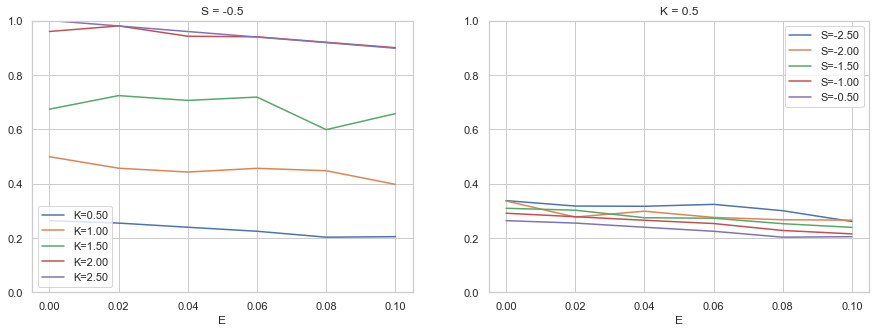

In [6]:
plot_experiment_1("../results/noise-harsh-cooperation.csv")

## Experiment 2: Noise Tolerant Strategies in Harsh Environments

In [7]:
######################
#   HELPER METHODS   #
######################

# Columns to measure in all dataframes
base_columns = ['S', 'K', 'E']


# Create a dataframe for every given file
def create_data_frames(filenames):
    dfs = list()
    for filename in filenames:
        dfs.append(pd.read_csv(filename))
    return dfs


# Remove unecessary columns
def filter_data_frames(dfs, strategies):
    counts = list()
    for i in range(len(dfs)):
        df = average_runs(dfs[i])
        strategy = strategies[i]
        count = '{}Count-final'.format(strategy)
        counts.append(count)
        columns_to_keep = base_columns.copy()
        columns_to_keep.append(count)
        df = df[columns_to_keep]
        dfs[i] = df
    return counts


# Merge all given dataframes in a single dataframe
def merge_data_frames(dfs):
    df = dfs[0]
    for i in range(1, len(dfs)):
        df = df.merge(dfs[i])
    return df


# Rename the columns of the data frame and remove overlapping columns
def rename_data_frame(df, strategies, counts):
    columns_to_keep = base_columns.copy()
    columns_to_keep.extend(counts)
    df = df[columns_to_keep]
    new_column_names = base_columns.copy()
    new_column_names.extend(strategies)
    df.columns = new_column_names
    return df


# Generate values S and K of interest
def create_keys_of_interest():
    keys_of_interest = list()
    for i in range(3):
        for j in range(3):
            s = -i
            k = j
            keys_of_interest.append((s, k))
    return keys_of_interest


# Plot the given dataframe in multiple subplots
def plot_data_frame(df, strategies):
    # Group for plotting
    gk = df.groupby(['S', 'K'])

    # Generate values S and K of interest
    keys_of_interest = create_keys_of_interest()
    
    # Create figures for plotting
    num_rows = int(sqrt(len(keys_of_interest)))
    fig, axes = plt.subplots(num_rows, num_rows, figsize=(15,15))
    axes = axes.flatten()
    ylim=(0, 6000)
        
    # Plot data on the figures
    for i in range(len(axes)):
        ax = axes[i]
        keys = keys_of_interest[i]
        group = gk.get_group(keys)
        title = 'S={:.2f}, K={:.2f}'.format(keys[0], keys[1])
        for strategy in strategies:
            group.plot(x='E', y=strategy, ax=ax, title=title, ylim=ylim)

            

# Plot the results of experiment 2 with the given files and strategies of interest
def plot_experiment_2(filenames, strategies):
    dfs = create_data_frames(filenames)
    counts = filter_data_frames(dfs, strategies)
    df = merge_data_frames(dfs)
    df = rename_data_frame(df, strategies, counts)
    plot_data_frame(df, strategies)
    

# Plot all strategy performances in given file name compared to given strategy
def plot_all_experiment_2(filename, strategy):
    assert strategy in ['TFT', 'CTFT', 'GTFT']
    filenames = []
    for i in range(9):
        filenames.append(filename)
    base = ['ALLC', 'ALLD', 'Pavlov', 'GRIM', 'RAND', 'STFT', 'TFTT', 'TTFT']
    strategies = list()
    strategies.append(strategy)
    strategies.extend(base)
    plot_experiment_2(filenames, strategies)
    

### The effects of Generosity and Contrition
- TFT, GTFT, and CTFT perform the same, even under noise, when environment is not harsh
- When cost of life $K$ increases:
   - TFT performance decreases when noise increases
   - GTFT performance decreases when noise increases, but at a slower rate
   - CTFT performance increases when noise increases
- When sucker's payoff $S$ decreases the difference in performance is less noticeable

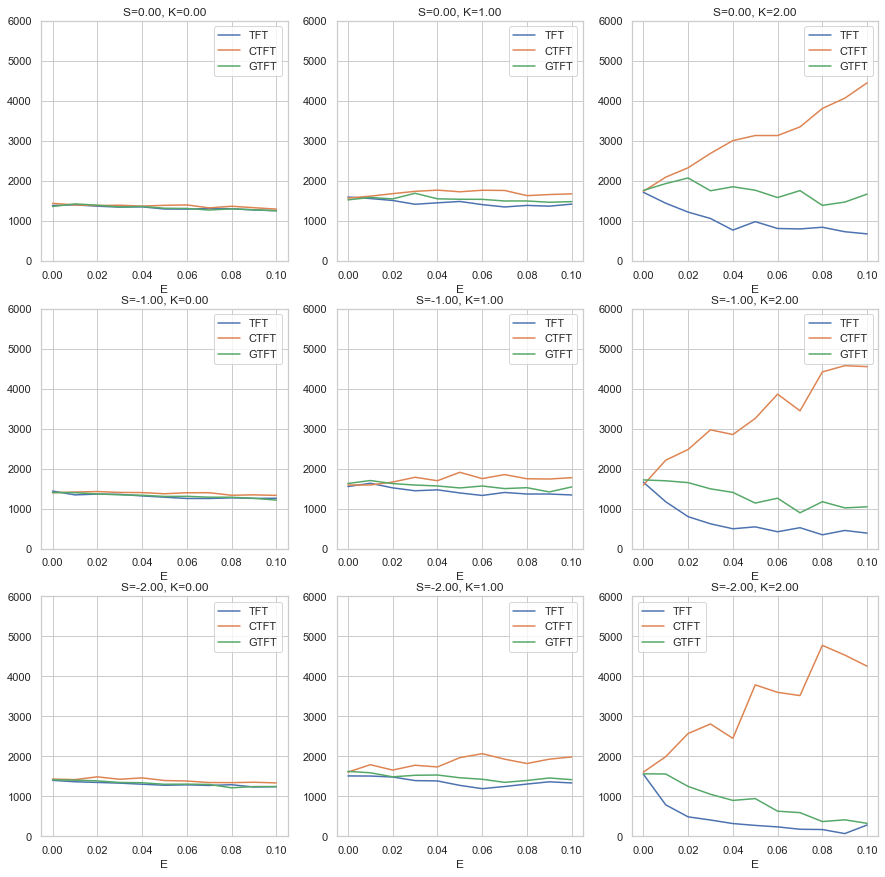

In [8]:
filenames = ['../results/tournament-TFT.csv', '../results/tournament-CTFT.csv', '../results/tournament-GTFT.csv']
strategies = ['TFT', 'CTFT', 'GTFT']

plot_experiment_2(filenames, strategies)

### Generosity not always better
No significant performance improvement between Pavlov strategy and generous GPavlov counterpart.

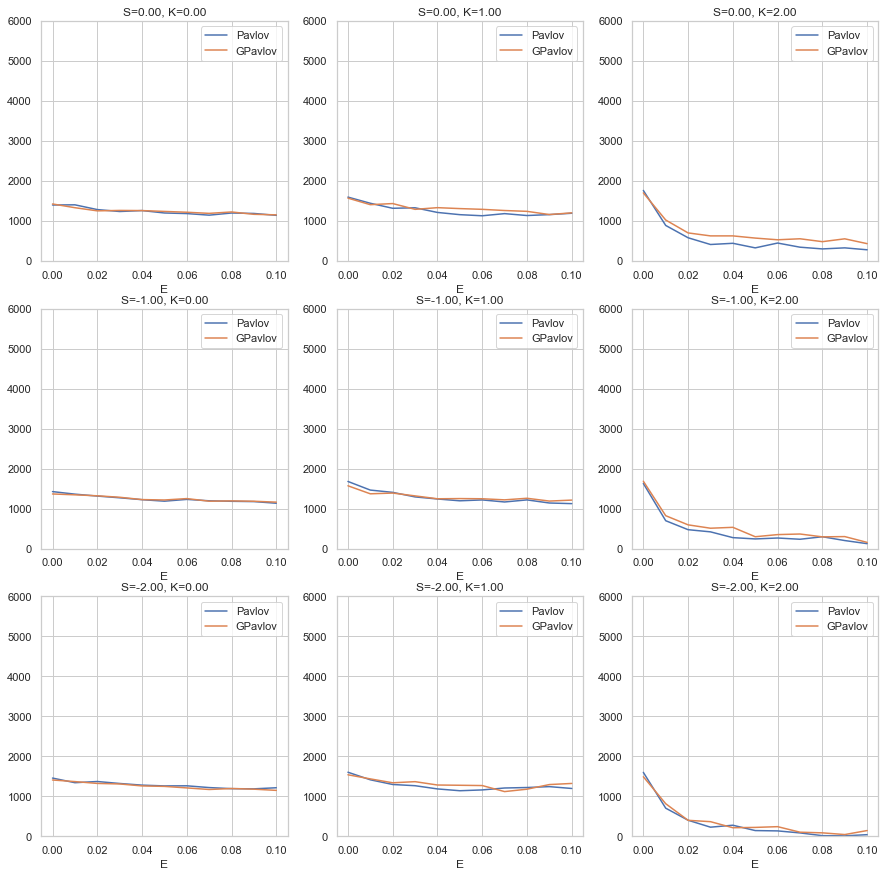

In [9]:
filenames = ['../results/tournament-TFT.csv', '../results/tournament-GPavlov.csv']
strategies = ['Pavlov', 'GPavlov']

plot_experiment_2(filenames, strategies)

### Forgiving Strategies Work Best in Harsh Noisy Environments
- Very forgiving strategies (ALLC and TFTT) have incredible performance in presence of noise in harsh environments
- GTFT is less forgiving than ALLC and TFTT, but still forgiving, differrence in performance visible

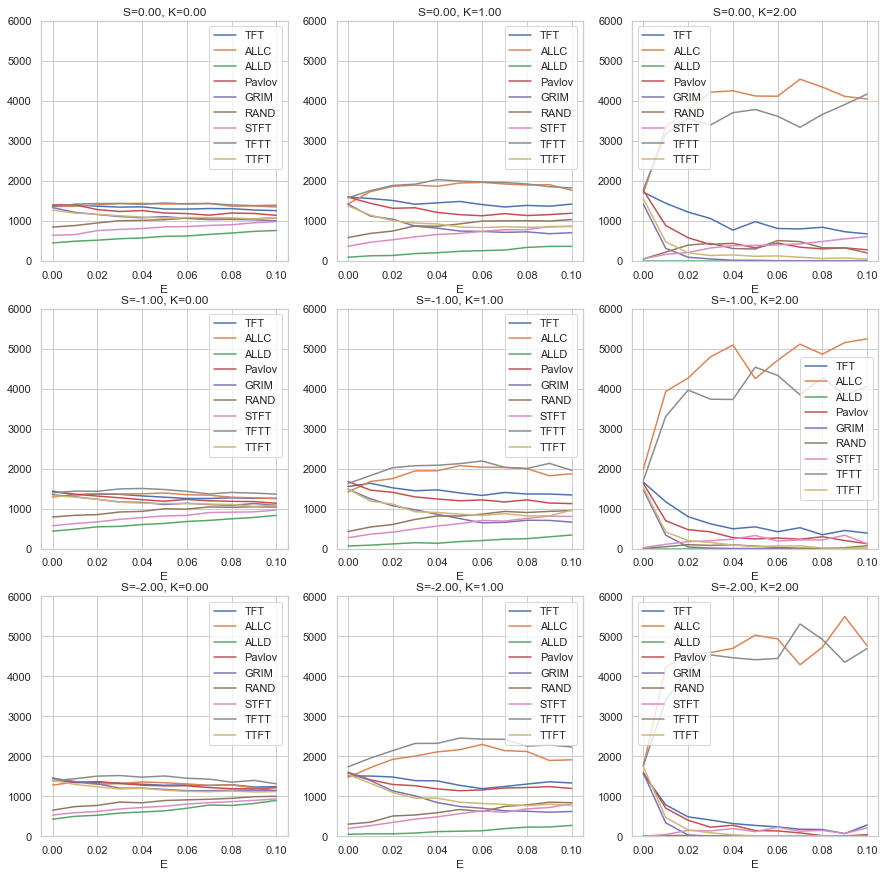

In [10]:
plot_all_experiment_2('../results/tournament-TFT.csv', 'TFT')

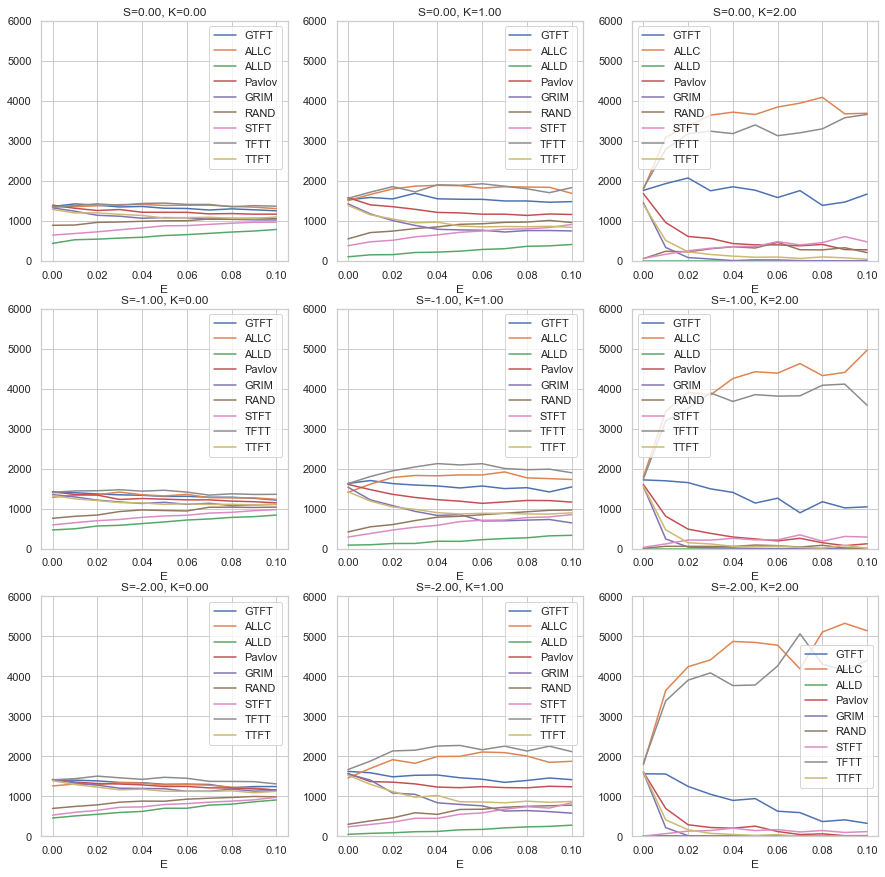

In [11]:
plot_all_experiment_2('../results/tournament-GTFT.csv', 'GTFT')

### Contrition Even Better for Higher Noise Levels
- Contrition (CTFT) is the best strategy when coping with high noise in harsh environments
- For higher noise contrition even defeats super forgiving strategies ALLC and TFTT

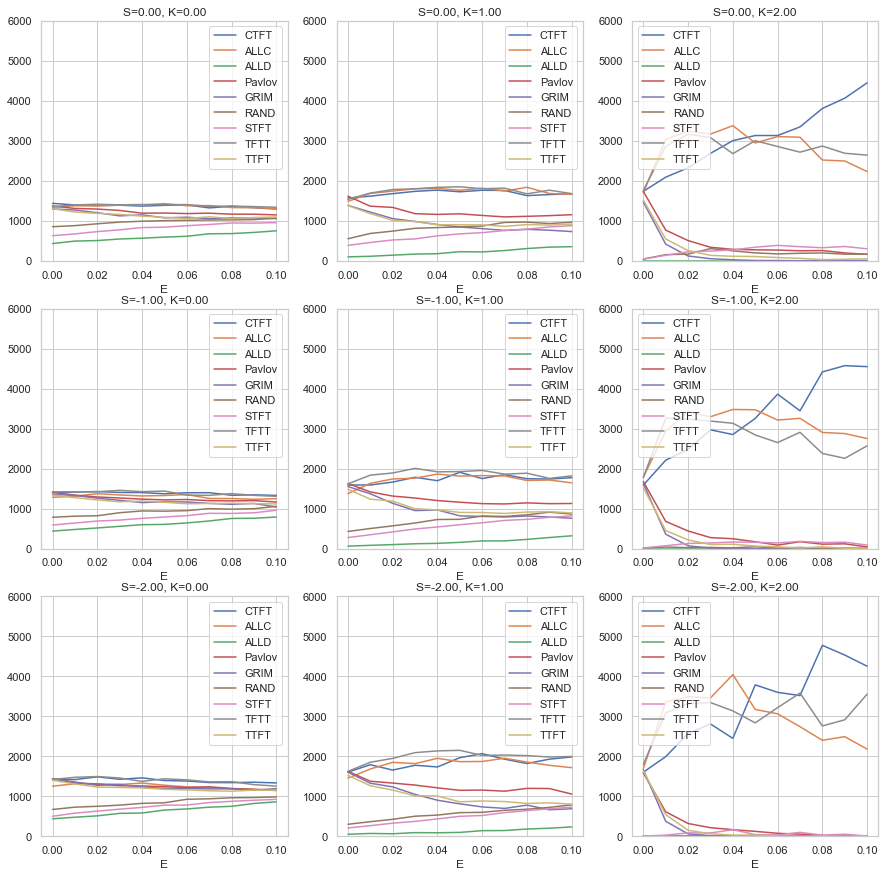

In [12]:
plot_all_experiment_2('../results/tournament-CTFT.csv', 'CTFT')

## Experimenting with visualizations

Trying out different visualizations for report

### Visualizing experiment 1

In [13]:
#######################
#   HELPER METHODS   #
######################

exp1_file = '../results/noise-harsh-cooperation.csv'

def visualize_exp_1(filename, kind):
    df = pd.read_csv(filename)
    df = df[['S', 'K', 'E', 'TotalCooperationFrequency-final']]
    df.columns = ['S', 'K', 'E', 'coop_freq']

    df = df[(df['E'] <= 0.1) & (df['S'] <= -0.5) & (df['K'] >= 0.5)]
    sf = df[df['S'] == -0.5]
    kf = df[df['K'] == 0.5]

    g = sns.catplot(x='E', y='coop_freq', hue='K', data=sf, height=5, kind=kind)
    g.despine(left=True)
    g.set_ylabels('average cooperation frequency')

    g = sns.catplot(x='E', y='coop_freq', hue='S', data=kf, height=5, kind=kind, hue_order=[-0.5, -1.0, -1.5, -2.0, -2.5])
    g.despine(left=True)
    g.set_ylabels('average cooperation frequency')

#### A. Bar plot

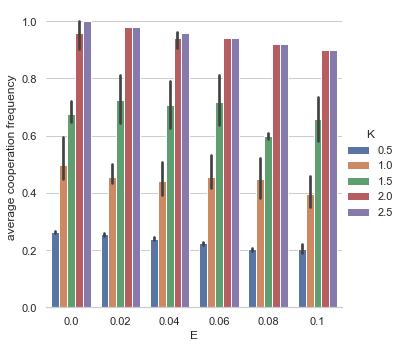

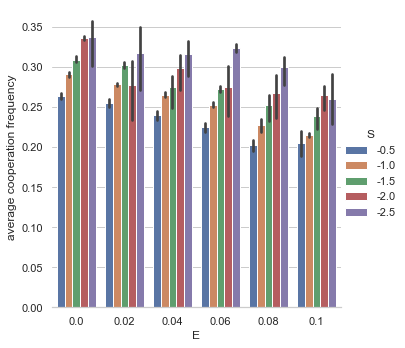

In [14]:
visualize_exp_1(exp1_file, 'bar')

#### B. Point plot

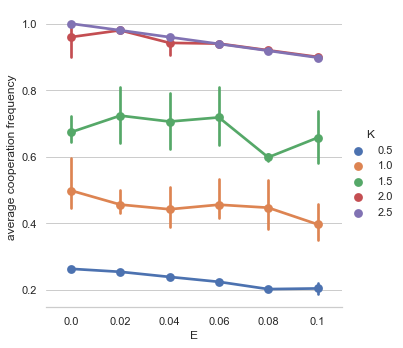

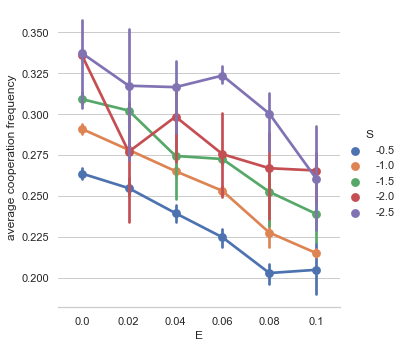

In [15]:
visualize_exp_1(exp1_file, 'point')

#### C. Swarm plot (current favorite)

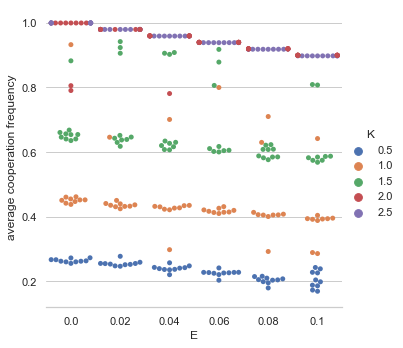

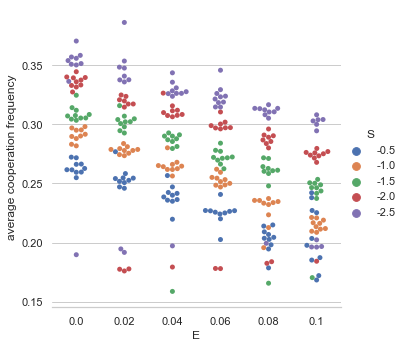

In [16]:
visualize_exp_1(exp1_file, 'swarm')

#### FINAL

(0, 1)

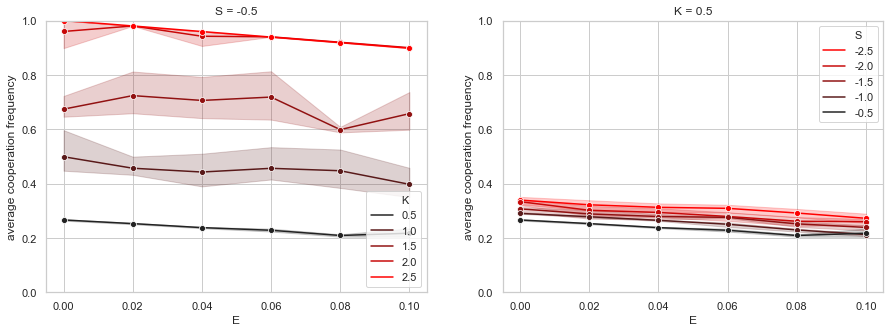

In [17]:
#######################
#   HELPER METHODS   #
######################

filename = '../results/noise-harsh-cooperation.csv'

df = pd.read_csv(filename)
df = df[['S', 'K', 'E', 'TotalCooperationFrequency-final']]
dfk = pd.read_csv('../results/noise-harsh-cooperation2K.csv')
dfk = dfk[['S', 'K', 'E', 'TotalCooperationFrequency-final']]
df = df.append(dfk)

coopfreq = 'average cooperation frequency'
df.columns = ['S', 'K', 'E', coopfreq]

s_interest = -0.5
k_interest = 0.5

df = df[(df['E'] <= 0.1) & (df['S'] <= -0.5) & (df['K'] >= 0.5)]
sf = df[df['S'] == s_interest]
kf = df[df['K'] == k_interest]

fig, axes = plt.subplots(1, 2, figsize=(15,5))

palette = sns.dark_palette("red", as_cmap=True)

g = sns.lineplot(x='E', y=coopfreq, hue='K', data=sf, ax=axes[0], legend='full', palette=palette, marker='o')
g.set_title('S = {}'.format(s_interest))
g.set_ylim(0, 1)

axes[0].legend(loc='lower right')

palette = sns.dark_palette("red", as_cmap=True, reverse=True)

g = sns.lineplot(x='E', y=coopfreq, hue='S', data=kf, ax=axes[1], legend='full', palette=palette, marker='o')
g.set_title('K = {}'.format(k_interest))
g.set_ylim(0, 1)



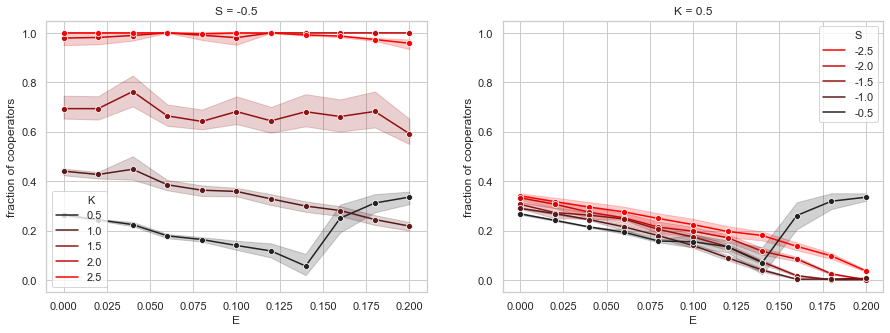

In [18]:
def plot_cooperators_freq(filename, ax, title, hue, reverse=False):
    dfk = pd.read_csv(filename)
    cooperators_frac = 'fraction of cooperators'
    # Count min is actually average count (wrong column output of MASON)
    dfk['sum'] = dfk[['ALLCCount-min', 'ALLDCount-min']].sum(axis=1)
    dfk[cooperators_frac] = dfk[['ALLCCount-min']].divide(dfk['sum'], axis=0)

    dfk = dfk[['S', 'K', 'E', 'TotalCooperationFrequency-final', cooperators_frac]]

    coopfreq = 'average cooperation frequency'
    dfk.columns = ['S', 'K', 'E', coopfreq, cooperators_frac]

    dfk = dfk[(dfk['E'] <= 0.2) & (dfk['S'] <= -0.5) & (dfk['K'] >= 0.5)]

    palette = sns.dark_palette("red", as_cmap=True, reverse=reverse)

    g = sns.lineplot(x='E', y=cooperators_frac, hue=hue, data=dfk, ax=ax, legend='full', palette=palette, marker='o')
    g.set_title(title)
    g.set_ylim(-0.05, 1.05)


fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_cooperators_freq('../results/noise-harsh-cooperation2S.csv', axes[0], 'S = -0.5', 'K')
plot_cooperators_freq('../results/noise-harsh-cooperation2K.csv', axes[1], 'K = 0.5', 'S', reverse=True)

### Visualizing experiment 2

In [19]:
base_columns = ['S', 'K', 'E']

def create_frames(filenames):
    dfs = list()
    for filename in filenames:
        dfs.append(pd.read_csv(filename))
    return dfs


def filter_frames(dfs, strategies):
    for i, (df, strategy) in enumerate(zip(dfs, strategies)):
        count = '{}Count-final'.format(strategy)
        df['strategy'] = strategy
        columns_to_keep = base_columns.copy()
        columns_to_keep.append(count)
        columns_to_keep.append('strategy')
        df = df[columns_to_keep]
        
        column_names = base_columns.copy()
        column_names.append('count')
        column_names.append('strategy')
        df.columns = column_names
                
        dfs[i] = df


def merge_frames(dfs, strategies):
    df = dfs[0]
    for i in range(1, len(dfs)):
        df = df.append(dfs[i])
    return df


# Generate values S and K of interest
def create_keys_of_interest():
    keys_of_interest = list()
    for i in range(3):
        for j in range(3):
            s = -i
            k = j
            keys_of_interest.append((s, k))
    return keys_of_interest


def plot_frames(df, strategies):
    # Generate values S and K of interest
    keys_of_interest = create_keys_of_interest()
    
    # Create figures for plotting
    num_rows = int(sqrt(len(keys_of_interest)))
    fig, axes = plt.subplots(num_rows, num_rows, figsize=(15,15))
    axes = axes.flatten()
    ylim=(0, 6000)
    
    gk = df.groupby(['S', 'K'])
    
    for i, ax in enumerate(axes):
        keys = keys_of_interest[i]
        group = gk.get_group(keys)
        g = sns.lineplot(x='E', y='count', hue='strategy', data=group, ax=ax, marker='o')
        g.set_title('S = {}, K = {}'.format(keys[0], keys[1]))
        g.set_ylim(0, 7000)

            
def visualize_exp_2(filenames, strategies):
    dfs = create_frames(filenames)
    filter_frames(dfs, strategies)
    df = merge_frames(dfs, strategies)
    plot_frames(df, strategies)
    

# Plot all strategy performances in given file name compared to given strategy
def visualize_all_experiment_2(filename, strategy):
    assert strategy in ['TFT', 'CTFT', 'GTFT', 'SGTFT', 'SGPavlov']
    filenames = []
    for i in range(9):
        filenames.append(filename)
    base = ['ALLC', 'ALLD', 'Pavlov', 'GRIM', 'RAND', 'STFT', 'TFTT', 'TTFT']
    strategies = list()
    strategies.append(strategy)
    strategies.extend(base)
    visualize_exp_2(filenames, strategies)
    

#### TFT vs GTFT vs SGTFT vs CTFT

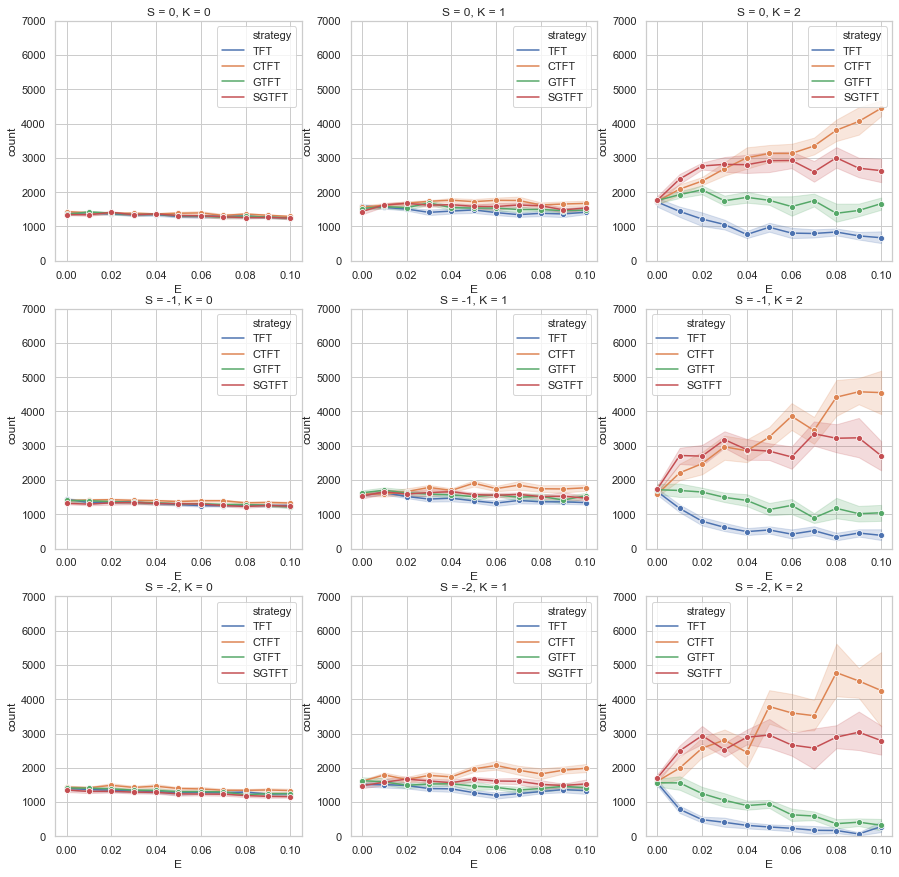

In [20]:
filenames = ['../results/tournament-TFT.csv', '../results/tournament-CTFT.csv', '../results/tournament-GTFT.csv', '../results/tournament-SGTFT.csv']
strategies = ['TFT', 'CTFT', 'GTFT', 'SGTFT']

visualize_exp_2(filenames, strategies)

#### Pavlov vs Gpavlov

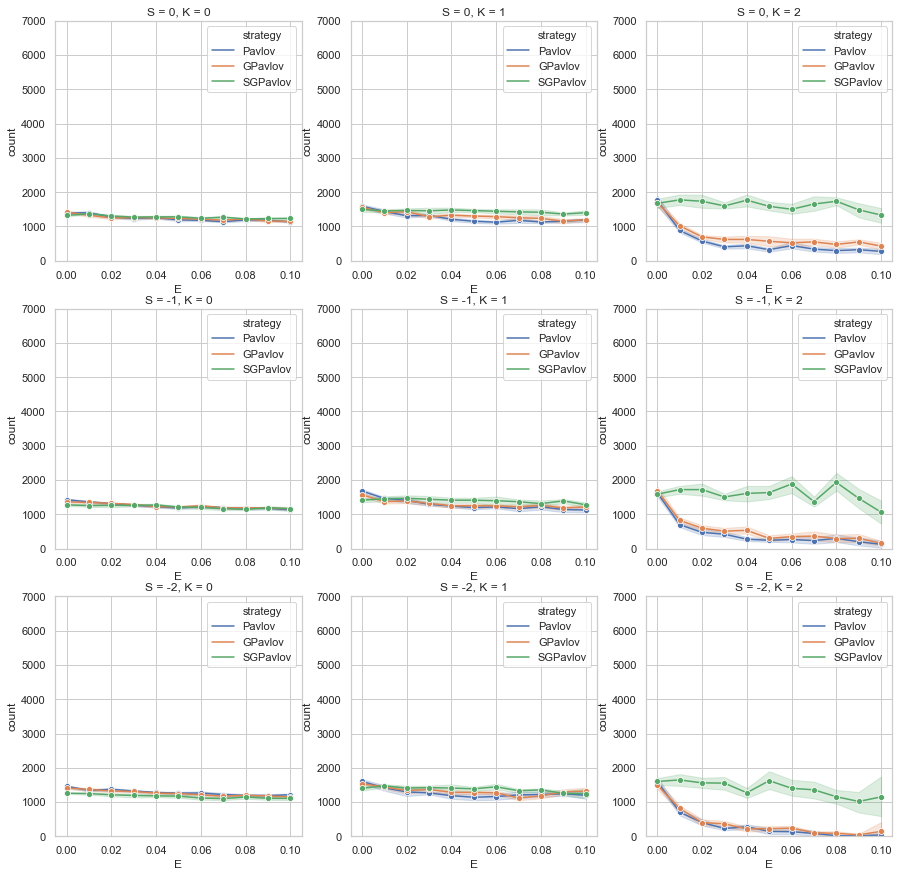

In [21]:
filenames = ['../results/tournament-TFT.csv', '../results/tournament-GPavlov.csv', '../results/tournament-SGPavlov.csv']
strategies = ['Pavlov', 'GPavlov', 'SGPavlov']

visualize_exp_2(filenames, strategies)

#### Tournaments

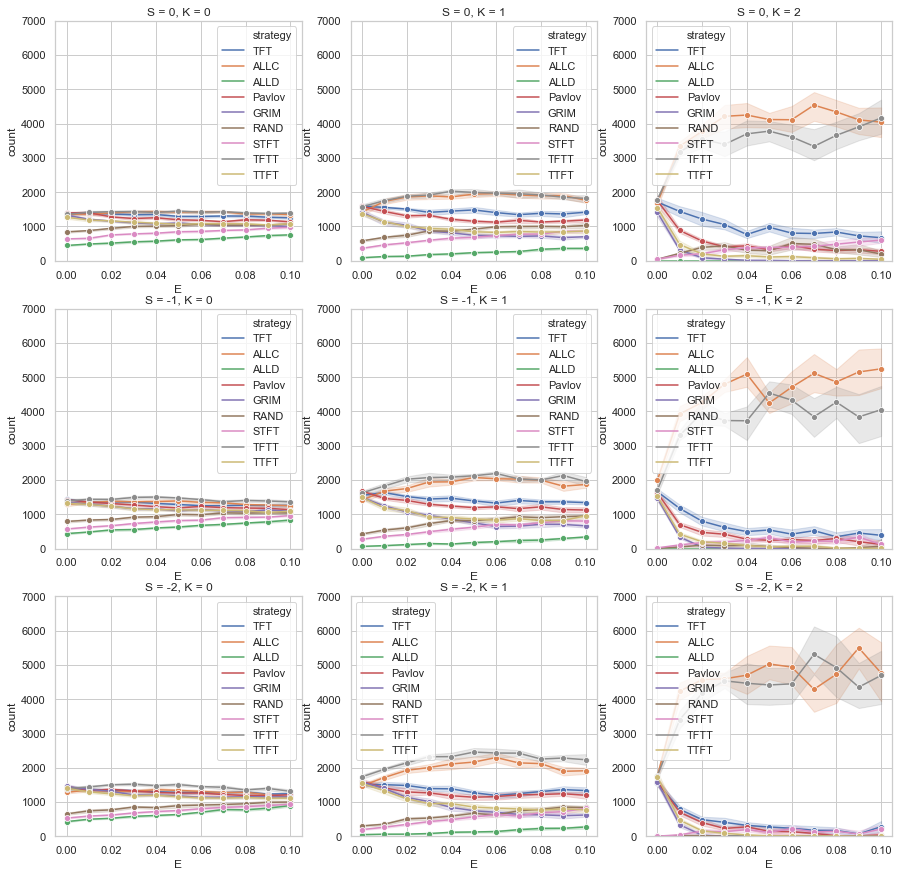

In [22]:
visualize_all_experiment_2('../results/tournament-TFT.csv', 'TFT')

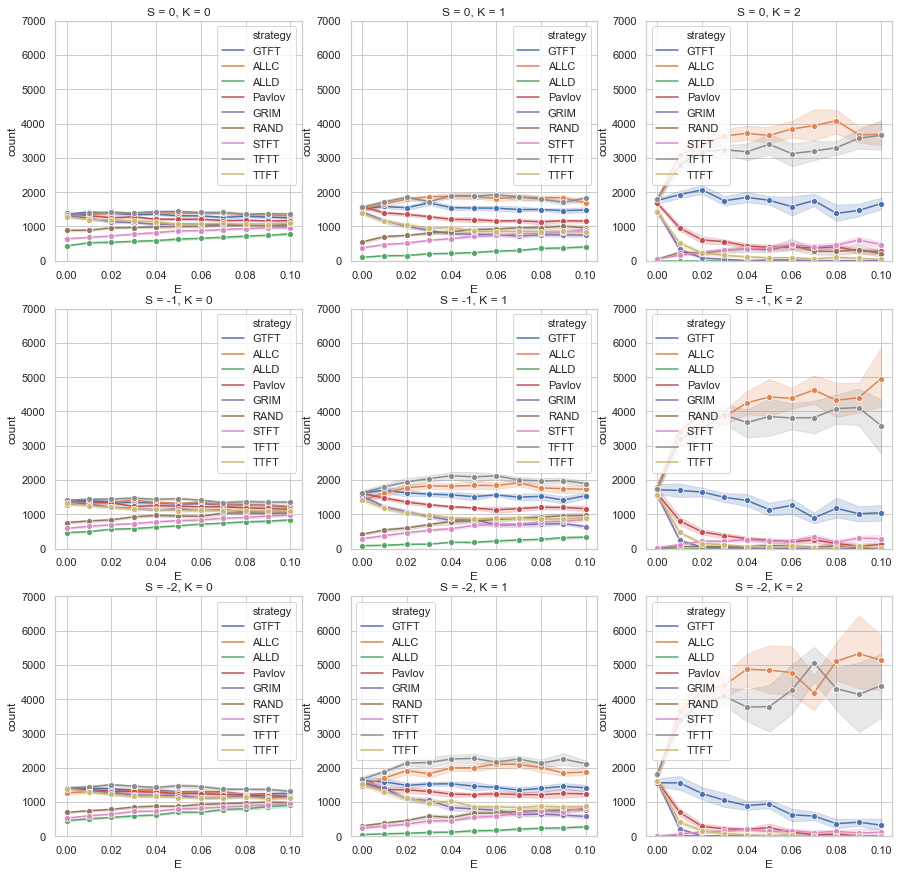

In [23]:
visualize_all_experiment_2('../results/tournament-GTFT.csv', 'GTFT')

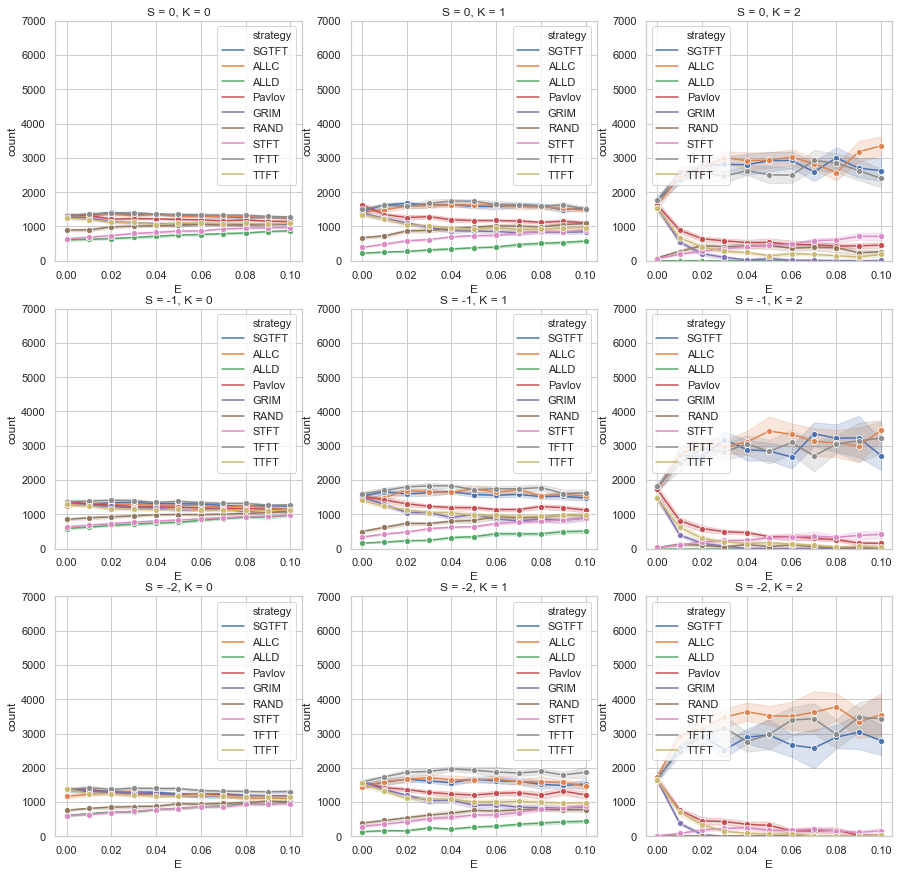

In [24]:
visualize_all_experiment_2('../results/tournament-SGTFT.csv', 'SGTFT')

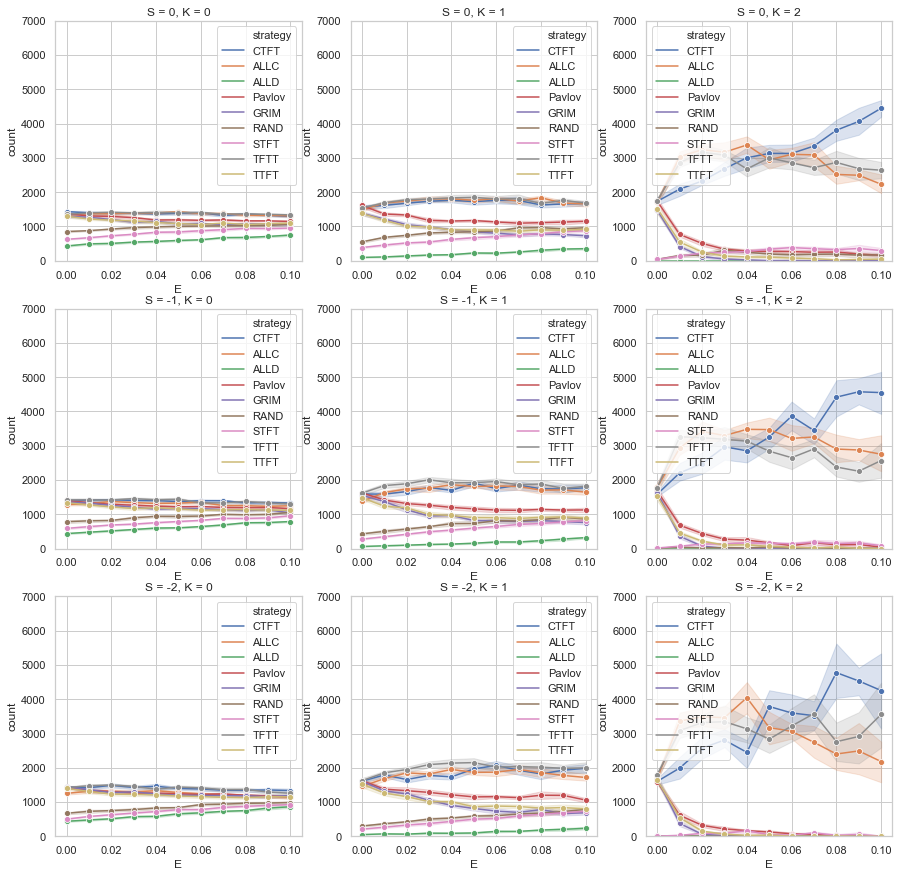

In [25]:
visualize_all_experiment_2('../results/tournament-CTFT.csv', 'CTFT')

## Statistical Significance